In [119]:
# Import libraries that we need

import numpy as np 
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt


from pprint import pprint

from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle

In [120]:
with open("p1.json") as file:
    data = json.load(file)
    
print (len(data))

21


In [144]:
# violations - minor_violations > 0.9 r2 ok
# ncloc      - functions > 0.9 r1 (drop 108k)
# code_smells      - violations > 0.9 r3 (drop 414, 189)
# ncloc - files > 0.85 r15
# ncloc - complexity > 0.85 r1
# lines - ncloc > 0.9 r3


feature1 = "classes"
feature2 = "functions"

In [145]:
minv = [float(x[feature1]) for x in data]
print (minv)

[3.0, 1334.0, 172.0, 748.0, 79.0, 7.0, 20.0, 89.0, 16.0, 47.0, 202.0, 14.0, 149.0, 4.0, 3.0, 56.0, 558.0, 1.0, 1839.0, 2.0, 43.0]


In [146]:
majv = [float(x[feature2]) for x in data]
print (majv)

[16.0, 2697.0, 759.0, 2917.0, 609.0, 36.0, 312.0, 962.0, 116.0, 626.0, 2472.0, 212.0, 1298.0, 46.0, 41.0, 489.0, 5947.0, 100.0, 5540.0, 21.0, 261.0]


In [147]:
for i in range(len(minv) - 1):
    for j in range(i+1, len(minv)):
        if minv[i] > minv[j]:
            minv[i], minv[j] = minv[j], minv[i]
            majv[i], majv[j] = majv[j], majv[i]

In [148]:
#del minv[len(minv) - 3]
#del majv[len(majv) - 3]

#del minv[len(minv) - 4]
#del majv[len(majv) - 4]

print (minv)
print (majv)

[1.0, 2.0, 3.0, 3.0, 4.0, 7.0, 14.0, 16.0, 20.0, 43.0, 47.0, 56.0, 79.0, 89.0, 149.0, 172.0, 202.0, 558.0, 748.0, 1334.0, 1839.0]
[100.0, 21.0, 16.0, 41.0, 46.0, 36.0, 212.0, 116.0, 312.0, 261.0, 626.0, 489.0, 609.0, 962.0, 1298.0, 759.0, 2472.0, 5947.0, 2917.0, 2697.0, 5540.0]


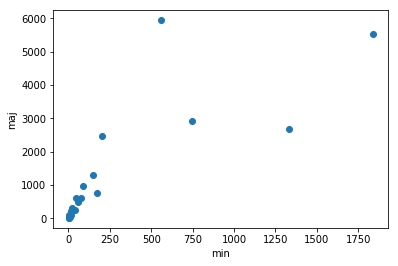

In [149]:
x = np.array(minv)
y = np.array(majv)

plt.scatter(x, y)
plt.xlabel("min")
plt.ylabel("maj")
plt.show()

In [150]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

datax_train, datax_test, datay_train, datay_test = train_test_split(x, y, test_size=0.33, random_state=1)
linear_reg = linear_model.LinearRegression()

datax_train = np.atleast_2d(datax_train).T
datay_train = np.atleast_2d(datay_train).T
datax_test = np.atleast_2d(datax_test).T
datay_test = np.atleast_2d(datay_test).T

linear_reg.fit(datax_train, datay_train)

predict = linear_reg.predict(datax_test)

In [151]:
from sklearn.metrics import r2_score

print ('r2_score:', r2_score(datay_test, predict))

print ('score:', linear_reg.score(datay_test, predict))

print('Coefficient: \n', linear_reg.coef_)
print('Intercept: \n', linear_reg.intercept_)

r2_score: 0.042494280581601096
score: -87.66342869990376
Coefficient: 
 [[2.58187138]]
Intercept: 
 [168.74122016]


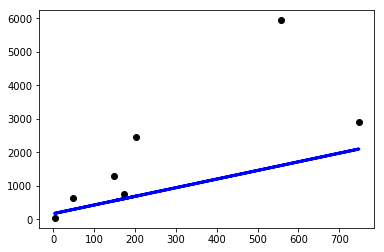

In [152]:
plt.scatter(datax_test, datay_test,  color='black')
plt.plot(datax_test, predict, color='blue', linewidth=3)


plt.show()

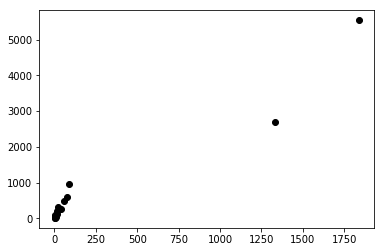

In [153]:
plt.scatter(datax_train, datay_train,  color='black')


plt.show()

In [156]:
print (linear_reg.predict(1))

[[171.32309153]]
